  # **Big Five Personality Test**

 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv('/content/Personality Survey.csv')
data

,EXT1,EXT2,EXT3,EST1,EST2,EST3,AGR1,AGR2,AGR3,CSN1,CSN2,CSN3,OPN1,OPN2,OPN3
0,1,2,2.0,2,4,2,3,2,4,2,4,4,4,5,4
1,3,3,1.0,5,5,5,1,5,4,1,5,3,3,5,5
2,5,5,4.0,1,4,5,5,5,4,2,5,5,2,5,2
3,3,5,5.0,5,5,3,3,5,3,2,3,3,3,5,4
4,2,3,3.0,5,5,5,4,5,2,5,3,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,3,5,1.0,5,5,1,3,4,5,1,5,1,2,5,5
184,5,1,1.0,1,5,4,5,1,5,5,5,1,5,5,4
185,3,5,2.0,5,5,5,5,1,3,5,1,5,2,5,5
186,2,1,NaN,5,5,2,4,5,5,1,4,1,4,4,3


In [5]:
#Check Missing Value
print('How many missing values: ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

How many missing values:  2
Number of participants after eliminating missing values:  186


# **Extroversion Personality**

# I dont talk a lot.
# I keep in the background.
# I don’t mind being the center of attention.

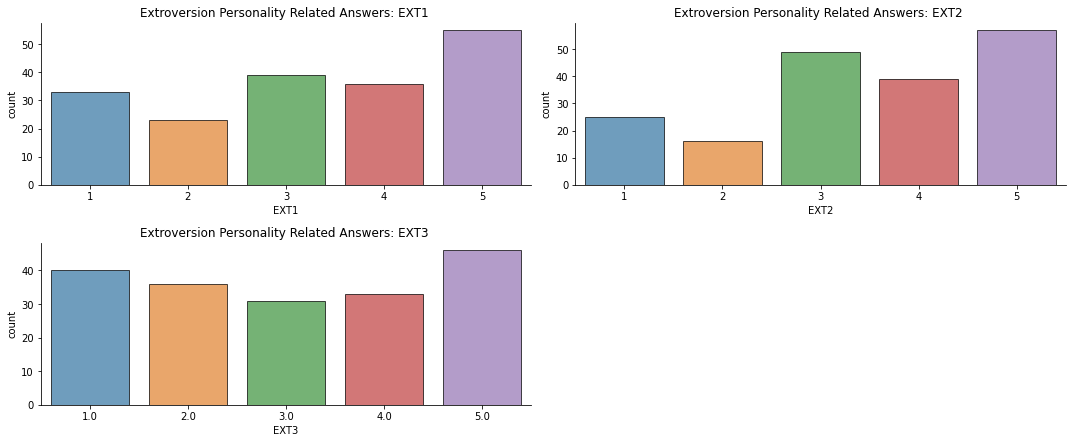

In [6]:
#barplots showing the frequency of each category
plt.figure(figsize=[15,15])
fft=['EXT1','EXT2','EXT3']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Extroversion Personality Related Answers: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# **Neuroticism Personality**
# I get stressed out easily.
# I worry about things.
# I am easily disturbed.


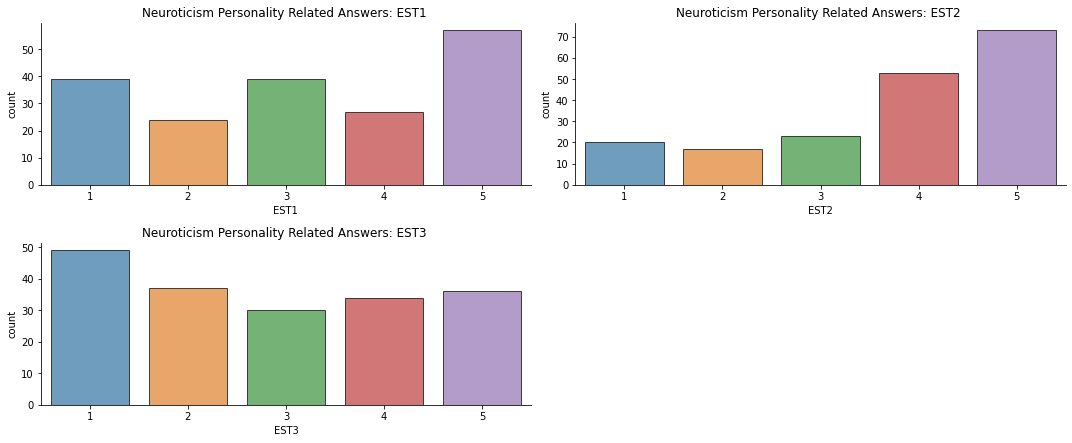

In [7]:
plt.figure(figsize=[15,15])
fft=['EST1','EST2','EST3']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Neuroticism Personality Related Answers: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# **Agreeable Personality**
# I feel little concern for others.
# I have a soft heart.
# I feel others’ emotions.

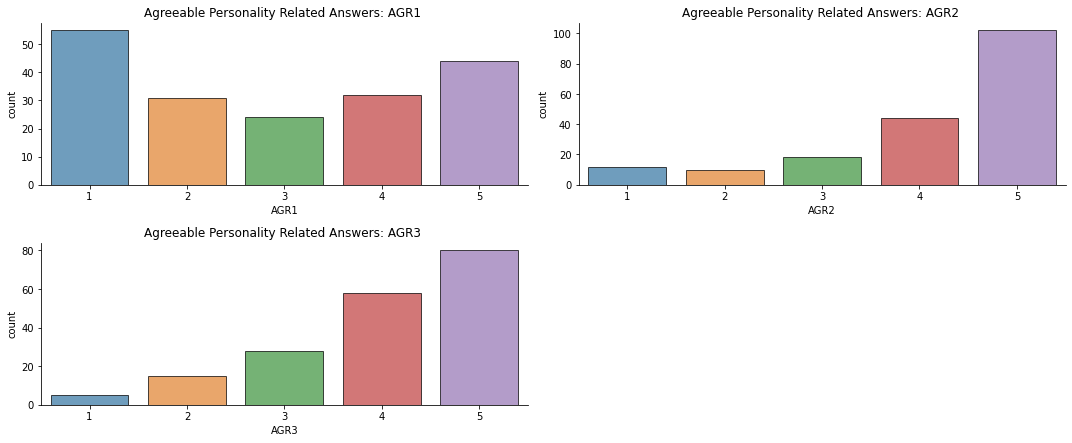

In [32]:
plt.figure(figsize=[15,15])
fft=['AGR1','AGR2','AGR3']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Agreeable Personality Related Answers: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# **Conscientious Personality**
# I leave my belongings around.
# I pay attention to details.
# I often forget to put things back in their proper place.



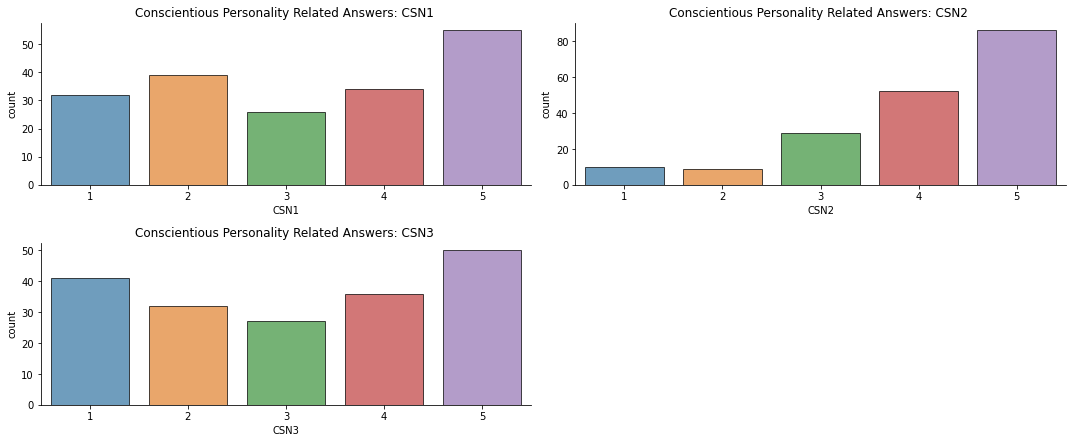

In [9]:
plt.figure(figsize=[15,15])
fft=['CSN1','CSN2','CSN3']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Conscientious Personality Related Answers: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# **Open Personality**
# I have a rich vocabulary.
# I have a vivid imagination.
# I have excellent ideas.


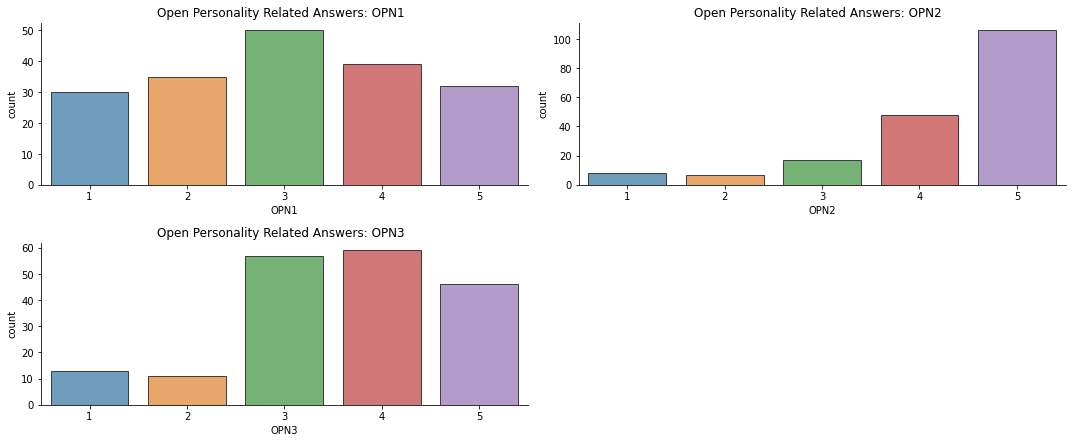

In [10]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['OPN1','OPN2','OPN3']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Open Personality Related Answers: {}  ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

## K-means


In [36]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans
X=data.copy()
df_model = X

#fit model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit_predict(df_model)

In [13]:
df_model['Personality'] = k_fit
df_model.head()

,EXT1,EXT2,EXT3,EST1,EST2,EST3,AGR1,AGR2,AGR3,CSN1,CSN2,CSN3,OPN1,OPN2,OPN3,Personality
0,1,2,2.0,2,4,2,3,2,4,2,4,4,4,5,4,0
1,3,3,1.0,5,5,5,1,5,4,1,5,3,3,5,5,2
2,5,5,4.0,1,4,5,5,5,4,2,5,5,2,5,2,4
3,3,5,5.0,5,5,3,3,5,3,2,3,3,3,5,4,2
4,2,3,3.0,5,5,5,4,5,2,5,3,5,3,5,3,3


In [14]:
df_model.Personality.value_counts()

2    44
3    42
4    38
0    31
1    31
Name: Personality, dtype: int64

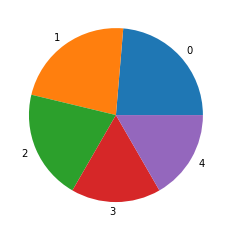

In [34]:
plt.pie(df_model.Personality.value_counts(),labels=[0,1,2,3,4])
plt.show() 

##K-Nearest neighbor

In [16]:
data=df_model
X=data.drop("Personality",axis=1)
Y=data["Personality"]

In [45]:
from sklearn import neighbors
from sklearn import metrics
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, knn_pred)
accuracy*100


89.47368421052632

##Naïve Bayes Algorithm

In [49]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)
accuracy = metrics.accuracy_score(y_test, bayes_pred)
print(accuracy*100)

100.0


#Support vector machine

In [19]:
from sklearn import svm
support = svm.SVC()

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2)

support.fit(X_train, y_train)
svm_pred= support.predict(X_test)
accuracy = metrics.accuracy_score(y_test, svm_pred)
accuracy*100

78.94736842105263

#Confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'K-Nearest neighbor')

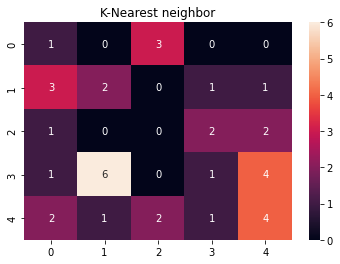

In [20]:
matrix=confusion_matrix(y_test, knn_pred)
confusion_heat = pd.DataFrame(matrix, range(5), range(5))
sns.heatmap(confusion_heat, annot=True)
plt.title("K-Nearest neighbor")

Text(0.5, 1.0, 'Naïve Bayes Algorithm')

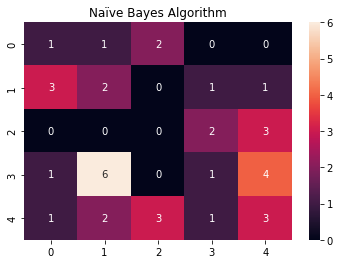

In [21]:
matrix=confusion_matrix(y_test, bayes_pred)
confusion_heat = pd.DataFrame(matrix, range(5), range(5))
sns.heatmap(confusion_heat, annot=True)
plt.title("Naïve Bayes Algorithm")


Text(0.5, 1.0, 'Support vector machine')

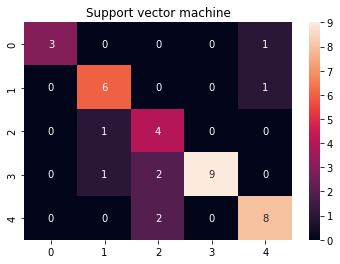

In [22]:
matrix=confusion_matrix(y_test, svm_pred)
confusion_heat = pd.DataFrame(matrix, range(5), range(5))
sns.heatmap(confusion_heat, annot=True)
plt.title("Support vector machine")